### 프로젝트 수행 방법

주 데이터는 cars.csv이며, 보조자료로 brand.csv도 준비되어있으니 함께 활용해보세요.

이번 프로젝트에서는 "중고차 가격 예측 모델"을 가정하여 데이터를 준비해볼 수도 있고, "중고차 특성에 따른 클러스터링"을 가정하여 데이터를 준비해볼 수도 있습니다.

아직 머신러닝 알고리즘을 학습하기 전 단계이니, 배웠던 내용을 최대한 활용하여 다양하게 데이터를 변환해보세요.

만약 이전에 배웠던 학습 내용이 익숙하지 않다면 이전 내용을 다시 한번 복습해 주세요. 🤗


### Step 1. 이것만큼은 꼭 해보세요!

프로젝트에 정답은 없습니다. 배우신 내용을 토대로 자유롭게 데이터를 정제하고 변환하되, 아래 내용만큼은 반드시 실습해봅시다.

1. cars.csv와 brand.csv의 데이터 합치기

    - [힌트] cars.csv의 title 변수로부터 브랜드 데이터를 추출할 수 있습니다.

2. 카테고리형 변수를 숫자 형태로 변환하기

    - [힌트] Engine, Emission Class 변수에 주목하세요!

3. 결측치 처리하기

    - [힌트] Service history 변수의 결측치는 'Unknown'으로 채우고, 결측치 변수가 일정 개수 이상 포함된 데이터는 제거합니다.

4. Scaler 활용해보기

5. 기존 데이터의 정보 70% 이상을 가지는 수준에서 최소한의 주성분 추출 (PCA)

### Step 2. 이런것도 해볼 수 있어요!

자유롭게 실습을 해보시고, 여유가 되면 아래의 내용도 실습해보세요.

국가별 총 브랜드 개수는?

상관관계가 높은 변수들이 있는지 확인해보세요.

프로젝트 제출 루브릭

학습목표

- 데이터의 결합하고, 데이터를 그룹화 하여 요약된 정보로 나타낼 수 있는가?

- 데이터의 스케일을 변형하고, 각 스케일러의 특성을 이해하였는가?

- 원하는 만큼의 주성분을 추출하고, 기존 데이터에 대한 설명력을 제시할 수 있는가?

평가기준

- 데이터 결합 및 그룹화 기법을 활용하여 요약 정보를 정확하게 나타 내었는가?

- 스케일링을 효과적으로 사용하고 각 스케일러별 특성에 대해 이해 하였는가?

- 원하는 주성분 분석에 필요한 데이터 추출이 가능하며, 추출후에는 해당 데이터에 대해 해석이 가능한가?

# 영국시장의 중고 자동차 가격 데이터 다루기[프로젝트]

## 📋 데이터 확인, 합치기, 정제 

### 1. 라이브러리 import 와 데이터 로드

In [439]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

car_df = pd.read_csv('C:/Users/허재민/Desktop/새 폴더/cars.csv')
brand_df = pd.read_csv('C:/Users/허재민/Desktop/새 폴더/brand.csv')

### 2. 데이터 개요

In [440]:
display(car_df.head())
display(brand_df.head())
display(car_df.info())
display(brand_df.info())

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 374.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    48 non-null     object
 1   country  48 non-null     object
dtypes: object(2)
memory usage: 900.0+ bytes


None

### 3. 데이터 고유값 통일 

In [441]:
display(car_df["title"].nunique())
display(brand_df["title"].nunique())

455

48

In [442]:
car_df['title'].unique()

array(['SKODA FABIA', 'VAUXHALL CORSA', 'HYUNDAI I30', 'MINI HATCH',
       'HYUNDAI COUPE', 'FORD FOCUS', 'VOLVO 740', 'PEUGEOT 207',
       'FORD FIESTA', 'VAUXHALL INSIGNIA', 'BMW 3 SERIES', 'CITROEN C1',
       'CITROEN C4', 'VAUXHALL ASTRA', 'FORD MONDEO',
       'MERCEDES-BENZ A180', 'PEUGEOT 407', 'FORD KA',
       'MERCEDES-BENZ A CLASS', 'MAZDA MAZDA2', 'SAAB 9-3',
       'VOLKSWAGEN POLO', 'BMW 1 SERIES', 'HONDA ACCORD',
       'VOLKSWAGEN BEETLE', 'MG MG6', 'FORD C-MAX', 'HONDA CIVIC',
       'TOYOTA AURIS', 'VOLVO S40', 'SEAT IBIZA', 'PEUGEOT 308',
       'VAUXHALL MERIVA', 'MERCEDES-BENZ B CLASS', 'MAZDA MAZDA3',
       'NISSAN 350 Z', 'ALFA ROMEO MITO', 'RENAULT FLUENCE',
       'VOLKSWAGEN PASSAT', 'KIA SPORTAGE', 'CITROEN XM',
       'VAUXHALL ANTARA', 'NISSAN NOTE', 'BMW 5 SERIES', 'HONDA CR-V',
       'PROTON SAVVY', 'NISSAN MICRA', 'FIAT PANDA', 'RENAULT MEGANE',
       'RENAULT CLIO', 'HYUNDAI I20', 'CITROEN C3', 'AUDI A6 SALOON',
       'TOYOTA YARIS', 'FIAT 500', 

In [443]:
brand_df['title'].unique()

array(['skoda', 'vauxhall', 'hyundai', 'mini', 'ford', 'volvo', 'peugeot',
       'bmw', 'citroen', 'mercedes-benz', 'mazda', 'saab', 'volkswagen',
       'honda', 'mg', 'toyota', 'seat', 'nissan', 'alfa', 'renault',
       'kia', 'proton', 'fiat', 'audi', 'mitsubishi', 'lexus', 'land',
       'chevrolet', 'suzuki', 'dacia', 'daihatsu', 'jeep', 'jaguar',
       'chrysler', 'rover', 'ds', 'daewoo', 'dodge', 'porsche', 'subaru',
       'infiniti', 'abarth', 'smart', 'marcos', 'maserati', 'ssangyong',
       'lagonda', 'isuzu'], dtype=object)

In [444]:
car_df['Brand'] = car_df['title'].str.split().str[0]

In [445]:
car_df[['title', 'Brand']].head(10)

,title,Brand
0,SKODA FABIA,SKODA
1,VAUXHALL CORSA,VAUXHALL
2,HYUNDAI I30,HYUNDAI
3,MINI HATCH,MINI
4,VAUXHALL CORSA,VAUXHALL
5,HYUNDAI COUPE,HYUNDAI
6,FORD FOCUS,FORD
7,VAUXHALL CORSA,VAUXHALL
8,VOLVO 740,VOLVO
9,PEUGEOT 207,PEUGEOT


In [446]:
brand_df['title'] = brand_df['title'].str.upper()
brand_df['title'].unique()

array(['SKODA', 'VAUXHALL', 'HYUNDAI', 'MINI', 'FORD', 'VOLVO', 'PEUGEOT',
       'BMW', 'CITROEN', 'MERCEDES-BENZ', 'MAZDA', 'SAAB', 'VOLKSWAGEN',
       'HONDA', 'MG', 'TOYOTA', 'SEAT', 'NISSAN', 'ALFA', 'RENAULT',
       'KIA', 'PROTON', 'FIAT', 'AUDI', 'MITSUBISHI', 'LEXUS', 'LAND',
       'CHEVROLET', 'SUZUKI', 'DACIA', 'DAIHATSU', 'JEEP', 'JAGUAR',
       'CHRYSLER', 'ROVER', 'DS', 'DAEWOO', 'DODGE', 'PORSCHE', 'SUBARU',
       'INFINITI', 'ABARTH', 'SMART', 'MARCOS', 'MASERATI', 'SSANGYONG',
       'LAGONDA', 'ISUZU'], dtype=object)

### 4. 데이터 합치기 및 데이터 개요

In [447]:
df = car_df.merge(
    brand_df,
    left_on='Brand',
    right_on='title',
    how='left'
)
df = df.drop(columns=['title_y'])
df = df.rename(columns={
    'title_x': 'Title',
    'country': 'Country'
})
display(df.head())
display(df.info())


,Title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,Brand,Country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL,United Kingdom


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
 13  Brand              3687 non-null   object 
 14  Country            3687 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 432.2+ KB


None

#### 컬럼 뜻
| 컬럼명            | 한글     | 컬럼명            | 한글     |
| ----------------- | -------- | ----------------- | -------- |
| Title             | 차량명      | Gearbox           | 변속기      |
| Price             | 가격       | Doors             | 도어 수     |
| Mileage(miles)    | 주행거리(마일) | Seats             | 좌석 수     |
| Registration_Year | 최초 등록 연도 | Emission Class    | 배출가스 등급  |
| Previous Owners   | 이전 소유자 수 | Service history   | 정비 이력    |
| Fuel type         | 연료 종류    | Brand   | 브랜드 명    |
| Body type         | 차체 유형    | Country  | 생산지    |
| Engine            | 엔진       |

### 5. 결측치 확인 및 제거 

In [448]:
df.isna().sum()

Title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3147
Brand                   0
Country                 0
dtype: int64

In [449]:
(df.isna().sum() / len(df)) * 100

Title                 0.000000
Price                 0.000000
Mileage(miles)        0.000000
Registration_Year     0.000000
Previous Owners      38.269596
Fuel type             0.000000
Body type             0.000000
Engine                1.220504
Gearbox               0.000000
Doors                 0.678058
Seats                 0.949281
Emission Class        2.359642
Service history      85.353946
Brand                 0.000000
Country               0.000000
dtype: float64

In [450]:
display(df['Service history'].nunique())
df['Service history'].unique()

1

array([nan, 'Full'], dtype=object)

- **정비이력 'Service history' 같은경우는 총 데이터수에 85%가 정비를 받았는지 안받았는지 정비이력이 0인지 모르기때문에 컬럼자체를 삭제하는 방향이 옳다고 생각함**

In [451]:
display(df['Previous Owners'].nunique())
df['Previous Owners'].unique()

9

array([ 3.,  4., nan,  5.,  1.,  2.,  6.,  7.,  9.,  8.])

- **이전소유주 수 'Previous Owners같은 경우는 애매한 부분이 있어서 가격에 영향을 미치는지 확인 후 제거가 옳다고 생각했음**

In [452]:
df_po = df[df['Previous Owners'].notna()]
df_po.shape

(2276, 15)

In [453]:
df_po[['Previous Owners', 'Price']].describe()

,Previous Owners,Price
count,2276.000000,2276.000000
mean,2.807557,5976.692443
std,1.546028,4736.515788
min,1.000000,400.000000
25%,2.000000,2478.750000
50%,3.000000,4287.500000
75%,4.000000,8490.000000
max,9.000000,33900.000000


- **소유주수가 늘수록 가격은 떨어지는 영향이 있을거라 생각했는데 소유주수가 늘어날때 가격도 같이 늘어나는 것으로 봐서 단독 변수로 보긴 힘들듯 하여 삭제하는게 낫다고 생각함**

In [454]:
df_clear = df.drop(columns=['Previous Owners', 'Service history'])

In [455]:
df_clear.columns

Index(['Title', 'Price', 'Mileage(miles)', 'Registration_Year', 'Fuel type',
       'Body type', 'Engine', 'Gearbox', 'Doors', 'Seats', 'Emission Class',
       'Brand', 'Country'],
      dtype='object')

In [456]:
display(df_clear.isna().sum())
display((df_clear.isna().sum() / len(df_clear)) * 100)

Title                 0
Price                 0
Mileage(miles)        0
Registration_Year     0
Fuel type             0
Body type             0
Engine               45
Gearbox               0
Doors                25
Seats                35
Emission Class       87
Brand                 0
Country               0
dtype: int64

Title                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Fuel type            0.000000
Body type            0.000000
Engine               1.220504
Gearbox              0.000000
Doors                0.678058
Seats                0.949281
Emission Class       2.359642
Brand                0.000000
Country              0.000000
dtype: float64

In [457]:
display(df_clear['Engine'].nunique())
df_clear['Engine'].unique()

34

array(['1.4L', '1.2L', '1.3L', '2.0L', '1.6L', '2.3L', '1.8L', '1.0L',
       '3.0L', '1.5L', '1.9L', '2.4L', '2.2L', '3.5L', '3.2L', '2.5L',
       '1.1L', '3.1L', '3.7L', '2.6L', '2.1L', '2.8L', '5.0L', '0.8L',
       '2.7L', '1.7L', '0.9L', '4.2L', nan, '4.4L', '4.3L', '3.3L',
       '5.5L', '4.8L', '6.3L'], dtype=object)

In [458]:
display(df_clear['Seats'].nunique())
df_clear['Seats'].unique()

6

array([ 5.,  4., nan,  2.,  7.,  3.,  6.])

In [459]:
display(df_clear['Doors'].nunique())
df_clear['Doors'].unique()

4

array([ 5.,  3.,  4.,  2., nan])

In [460]:
display(df_clear['Emission Class'].nunique())
df_clear['Emission Class'].unique()

6

array(['Euro 6', 'Euro 4', 'Euro 5', nan, 'Euro 3', 'Euro 2', 'Euro 1'],
      dtype=object)

**나머지  'Engine', 'Seats', 'Doors', 'Emission Class' 4개에 대한 결측치는 결측비율이 낮아서 이상치 확인을 하고 결측치를 처리하는편이 낫나고 생각했음**

### 6. 이상치 확인

In [461]:
display(df_clear.head())
df_clear.dtypes

,Title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Brand,Country
0,SKODA FABIA,6900,70189,2016,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,VAUXHALL,United Kingdom


Title                 object
Price                  int64
Mileage(miles)         int64
Registration_Year      int64
Fuel type             object
Body type             object
Engine                object
Gearbox               object
Doors                float64
Seats                float64
Emission Class        object
Brand                 object
Country               object
dtype: object

**엔진과 배출가스등급은 숫자 + 문자형이라 숫자형으로 바꿔주고 이상치 체크.**

In [462]:
df_clear['Engine_num'] = (
    df_clear['Engine']
    .str.replace('L', '', regex=False)
    .astype(float)
)
df_clear['Emission_num'] = (
    df_clear['Emission Class']
    .str.replace('Euro ', '', regex=False)
    .astype(float)
)
df_clear.head(10)

,Title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Brand,Country,Engine_num,Emission_num
0,SKODA FABIA,6900,70189,2016,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,SKODA,Czech Republic,1.4,6.0
1,VAUXHALL CORSA,1495,88585,2008,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,VAUXHALL,United Kingdom,1.2,4.0
2,HYUNDAI I30,949,137000,2011,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,HYUNDAI,South Korea,1.4,5.0
3,MINI HATCH,2395,96731,2010,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,MINI,United Kingdom,1.4,4.0
4,VAUXHALL CORSA,1000,85000,2013,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,VAUXHALL,United Kingdom,1.3,5.0
5,HYUNDAI COUPE,800,124196,2007,Petrol,Coupe,2.0L,Manual,3.0,4.0,Euro 4,HYUNDAI,South Korea,2.0,4.0
6,FORD FOCUS,798,140599,2008,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,FORD,United States,1.6,4.0
7,VAUXHALL CORSA,1995,90000,2009,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,VAUXHALL,United Kingdom,1.2,4.0
8,VOLVO 740,750,225318,2025,Petrol,Estate,2.3L,Automatic,5.0,NaN,NaN,VOLVO,Sweden,2.3,NaN
9,PEUGEOT 207,1299,87000,2008,Diesel,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,PEUGEOT,France,1.6,4.0


In [463]:
num_cols = [
    'Mileage(miles)',
    'Registration_Year',
    'Doors',
    'Seats',
    'Engine_num',
    'Emission_num'
]
df_clear[num_cols].describe()

,Mileage(miles),Registration_Year,Doors,Seats,Engine_num,Emission_num
count,3.687000e+03,3687.000000,3662.000000,3652.000000,3642.000000,3600.000000
mean,8.132854e+04,2011.846216,4.321409,4.900329,1.606260,4.910000
std,3.941718e+04,5.082387,0.986760,0.577046,0.486584,0.910688
min,1.000000e+00,1953.000000,2.000000,2.000000,0.800000,1.000000
25%,5.698400e+04,2008.000000,3.000000,5.000000,1.300000,4.000000
50%,8.000000e+04,2012.000000,5.000000,5.000000,1.600000,5.000000
75%,1.030000e+05,2015.500000,5.000000,5.000000,1.900000,6.000000
max,1.110100e+06,2025.000000,5.000000,7.000000,6.300000,6.000000


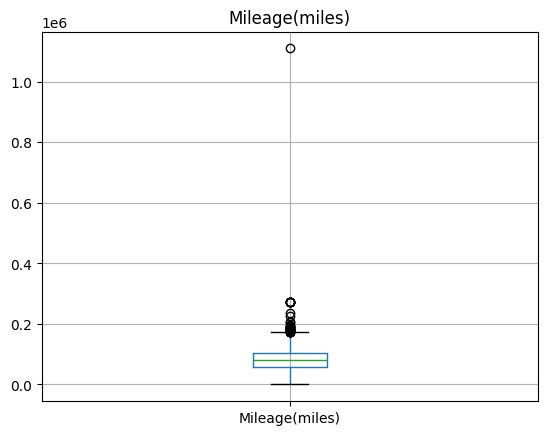

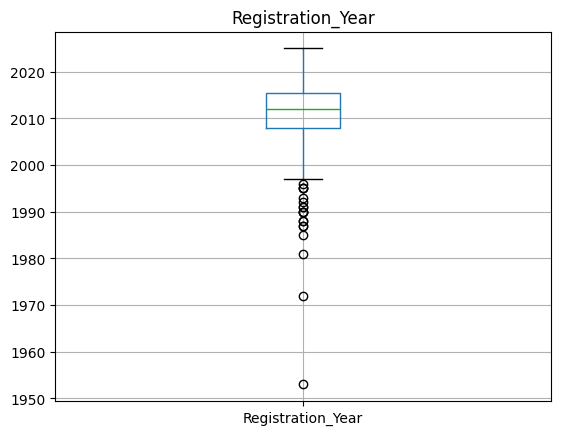

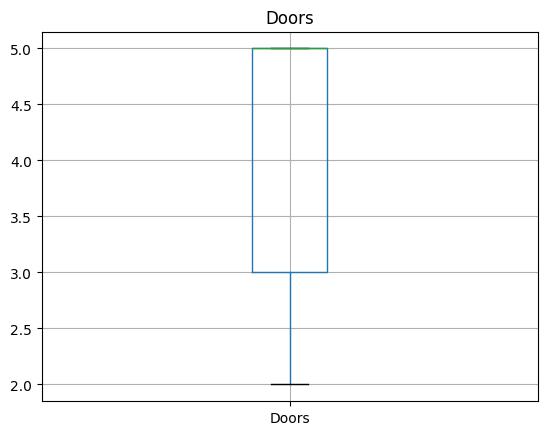

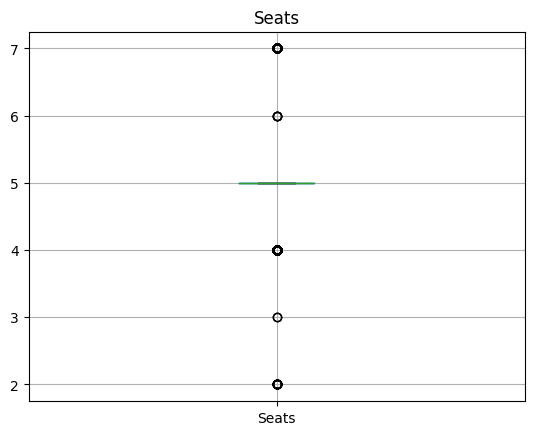

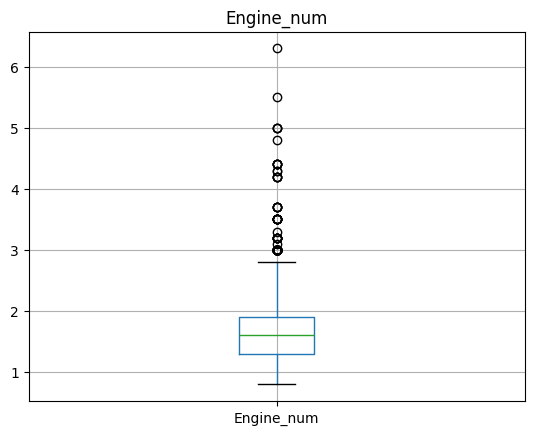

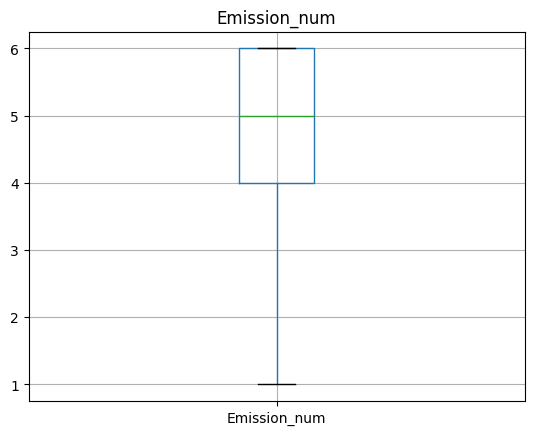

In [464]:
for col in num_cols:
    df_clear.boxplot(column=col)
    plt.title(col)
    plt.show()

**주행거리 부분 스케일이 너무 커서 박스플롯으로 보기엔 힘든 경향이 있어 내림차순으로 이상치를 확인하고자 함.**

In [465]:
df_clear['Mileage(miles)'].describe()

count    3.687000e+03
mean     8.132854e+04
std      3.941718e+04
min      1.000000e+00
25%      5.698400e+04
50%      8.000000e+04
75%      1.030000e+05
max      1.110100e+06
Name: Mileage(miles), dtype: float64

In [466]:
df_clear['Mileage(miles)'].max()

1110100

In [467]:
df_clear.sort_values('Mileage(miles)', ascending=False).head(10)

,Title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Brand,Country,Engine_num,Emission_num
1037,VOLKSWAGEN BEETLE,2495,1110100,2003,Petrol,Hatchback,2.0L,Automatic,3.0,4.0,Euro 4,VOLKSWAGEN,Germany,2.0,4.0
2048,VOLVO V70,795,274100,2004,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,VOLVO,Sweden,2.4,3.0
1478,VOLVO V70,795,274100,2004,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,VOLVO,Sweden,2.4,3.0
1259,VOLVO V70,795,274100,2004,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,VOLVO,Sweden,2.4,3.0
1685,VOLVO V70,795,274100,2004,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,VOLVO,Sweden,2.4,3.0
1283,VOLVO V70,795,274100,2004,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,VOLVO,Sweden,2.4,3.0
1933,VOLVO V70,795,274100,2004,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,VOLVO,Sweden,2.4,3.0
1946,VOLVO V70,795,274100,2004,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,VOLVO,Sweden,2.4,3.0
244,AUDI A6 AVANT,2600,234680,2011,Diesel,Estate,2.0L,Manual,5.0,5.0,Euro 5,AUDI,Germany,2.0,5.0
8,VOLVO 740,750,225318,2025,Petrol,Estate,2.3L,Automatic,5.0,NaN,NaN,VOLVO,Sweden,2.3,NaN


In [468]:
df_clear['Mileage(miles)'] = df_clear['Mileage(miles)'].clip(upper=300000)

111만 마일로 혼자 너무 튀어있어서 클리핑으로 30만 초과값을 30만으로 변경 

In [469]:
df_clear.sort_values('Mileage(miles)', ascending=False).head(10)

,Title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Brand,Country,Engine_num,Emission_num
1037,VOLKSWAGEN BEETLE,2495,300000,2003,Petrol,Hatchback,2.0L,Automatic,3.0,4.0,Euro 4,VOLKSWAGEN,Germany,2.0,4.0
2048,VOLVO V70,795,274100,2004,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,VOLVO,Sweden,2.4,3.0
1478,VOLVO V70,795,274100,2004,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,VOLVO,Sweden,2.4,3.0
1259,VOLVO V70,795,274100,2004,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,VOLVO,Sweden,2.4,3.0
1685,VOLVO V70,795,274100,2004,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,VOLVO,Sweden,2.4,3.0
1283,VOLVO V70,795,274100,2004,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,VOLVO,Sweden,2.4,3.0
1933,VOLVO V70,795,274100,2004,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,VOLVO,Sweden,2.4,3.0
1946,VOLVO V70,795,274100,2004,Petrol,Estate,2.4L,Automatic,5.0,5.0,Euro 3,VOLVO,Sweden,2.4,3.0
244,AUDI A6 AVANT,2600,234680,2011,Diesel,Estate,2.0L,Manual,5.0,5.0,Euro 5,AUDI,Germany,2.0,5.0
8,VOLVO 740,750,225318,2025,Petrol,Estate,2.3L,Automatic,5.0,NaN,NaN,VOLVO,Sweden,2.3,NaN


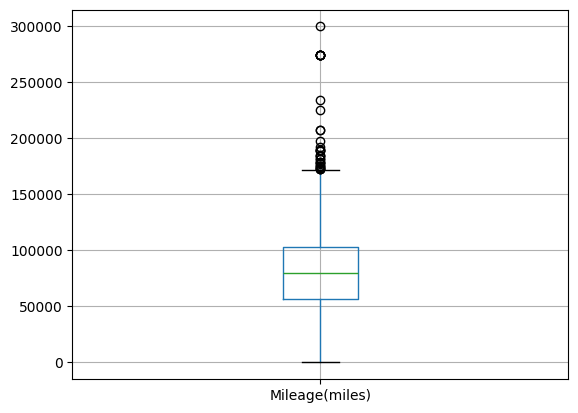

In [470]:
df_clear.boxplot(column='Mileage(miles)')
plt.show()

In [471]:
df_clear.sort_values('Registration_Year', ascending=True).head(20)

,Title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Brand,Country,Engine_num,Emission_num
3024,LAGONDA LG6 ROADSTER,14995,84000,1953,Petrol,Saloon,2.6L,Manual,4.0,NaN,NaN,LAGONDA,United Kingdom,2.6,NaN
237,MG MIDGET,1875,75043,1972,Petrol,Convertible,1.3L,Manual,2.0,NaN,NaN,MG,United Kingdom,1.3,NaN
2375,MARCOS MARTINA,11495,19000,1981,Petrol,Convertible,2.0L,Manual,NaN,2.0,NaN,MARCOS,United Kingdom,2.0,NaN
1239,NISSAN SUNNY,999,60000,1985,Petrol,Saloon,1.3L,Manual,4.0,NaN,NaN,NISSAN,Japan,1.3,NaN
1195,PORSCHE 944,6750,121000,1987,Petrol,Coupe,2.5L,Manual,2.0,4.0,NaN,PORSCHE,Germany,2.5,NaN
1353,BMW 3 SERIES,3495,115000,1987,Petrol,Saloon,1.8L,Automatic,4.0,NaN,NaN,BMW,Germany,1.8,NaN
1173,VOLKSWAGEN GOLF,2500,124000,1988,Petrol,Hatchback,1.8L,Automatic,5.0,5.0,NaN,VOLKSWAGEN,Germany,1.8,NaN
3116,VOLKSWAGEN GOLF,7000,130000,1988,Petrol,Convertible,1.8L,Manual,2.0,NaN,NaN,VOLKSWAGEN,Germany,1.8,NaN
733,TOYOTA CAMRY,2389,125000,1990,Petrol,Estate,2.0L,Automatic,5.0,NaN,NaN,TOYOTA,Japan,2.0,NaN
645,ROVER MINI,1650,49309,1990,Petrol,Saloon,1.0L,Automatic,2.0,NaN,NaN,ROVER,United Kingdom,1.0,NaN


### 7. 나머지 결측치 처리

In [472]:
display(df_clear.isna().sum())
display((df_clear.isna().sum() / len(df_clear)) * 100)

Title                 0
Price                 0
Mileage(miles)        0
Registration_Year     0
Fuel type             0
Body type             0
Engine               45
Gearbox               0
Doors                25
Seats                35
Emission Class       87
Brand                 0
Country               0
Engine_num           45
Emission_num         87
dtype: int64

Title                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Fuel type            0.000000
Body type            0.000000
Engine               1.220504
Gearbox              0.000000
Doors                0.678058
Seats                0.949281
Emission Class       2.359642
Brand                0.000000
Country              0.000000
Engine_num           1.220504
Emission_num         2.359642
dtype: float64

- **4가지 컬럼에 대한 결측치도 삭제**

In [473]:
df_clear = df_clear.dropna()
df_clear.isna().sum()

Title                0
Price                0
Mileage(miles)       0
Registration_Year    0
Fuel type            0
Body type            0
Engine               0
Gearbox              0
Doors                0
Seats                0
Emission Class       0
Brand                0
Country              0
Engine_num           0
Emission_num         0
dtype: int64

In [474]:
df_clear.shape

(3593, 15)

In [475]:
df.shape, df_clear.shape

((3687, 15), (3593, 15))

### 8. 중복된 데이터 처리

In [477]:
df_clear.duplicated().sum()

np.int64(800)

In [ ]:
df_clear[df_clear.duplicated(keep=False)]

,Title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Brand,Country,Engine_num,Emission_num
0,SKODA FABIA,6900,70189,2016,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,SKODA,Czech Republic,1.4,6.0
6,FORD FOCUS,798,140599,2008,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,FORD,United States,1.6,4.0
9,PEUGEOT 207,1299,87000,2008,Diesel,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,PEUGEOT,France,1.6,4.0
11,VAUXHALL INSIGNIA,2950,79000,2011,Petrol,Hatchback,1.8L,Manual,5.0,5.0,Euro 5,VAUXHALL,United Kingdom,1.8,5.0
12,SKODA FABIA,6900,70189,2016,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,SKODA,Czech Republic,1.4,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,MINI HATCH,11999,33156,2018,Petrol,Hatchback,1.5L,Manual,5.0,5.0,Euro 6,MINI,United Kingdom,1.5,6.0
3663,VAUXHALL ASTRA,4999,60139,2015,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 6,VAUXHALL,United Kingdom,1.6,6.0
3674,MITSUBISHI OUTLANDER,1489,145000,2007,Diesel,SUV,2.0L,Manual,5.0,7.0,Euro 4,MITSUBISHI,Japan,2.0,4.0
3675,VAUXHALL ASTRA,4999,60139,2015,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 6,VAUXHALL,United Kingdom,1.6,6.0


In [ ]:
df_clear.drop_duplicates(inplace=True)
df_clear.duplicated().sum()

np.int64(0)

In [ ]:
display(df_clear.shape)
display(df_clear.info())
display(df_clear.describe())

(2793, 15)

<class 'pandas.core.frame.DataFrame'>
Index: 2793 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              2793 non-null   object 
 1   Price              2793 non-null   int64  
 2   Mileage(miles)     2793 non-null   int64  
 3   Registration_Year  2793 non-null   int64  
 4   Fuel type          2793 non-null   object 
 5   Body type          2793 non-null   object 
 6   Engine             2793 non-null   object 
 7   Gearbox            2793 non-null   object 
 8   Doors              2793 non-null   float64
 9   Seats              2793 non-null   float64
 10  Emission Class     2793 non-null   object 
 11  Brand              2793 non-null   object 
 12  Country            2793 non-null   object 
 13  Engine_num         2793 non-null   float64
 14  Emission_num       2793 non-null   float64
dtypes: float64(4), int64(3), object(8)
memory usage: 349.1+ KB


None

,Price,Mileage(miles),Registration_Year,Doors,Seats,Engine_num,Emission_num
count,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000
mean,5327.117078,83785.816685,2011.433226,4.326889,4.889008,1.645077,4.822055
std,4137.939297,34775.128074,4.498639,0.980204,0.585643,0.515690,0.876418
min,400.000000,1.000000,1993.000000,2.000000,2.000000,0.800000,1.000000
25%,2449.000000,60000.000000,2008.000000,3.000000,5.000000,1.300000,4.000000
50%,3995.000000,83800.000000,2011.000000,5.000000,5.000000,1.600000,5.000000
75%,6995.000000,105500.000000,2014.000000,5.000000,5.000000,2.000000,5.000000
max,33900.000000,300000.000000,2023.000000,5.000000,7.000000,6.300000,6.000000


- **결측치와 중복값 모두 제거후 3687개의 인덱스에서 2793개의 인덱스로 894(24.24%)개의 데이터의 양이 줄었다.**

In [ ]:
df['Brand'].value_counts(normalize=True).head(10)

Brand
VAUXHALL         0.149173
FORD             0.111202
VOLKSWAGEN       0.073773
BMW              0.072959
PEUGEOT          0.066450
TOYOTA           0.052889
NISSAN           0.048820
RENAULT          0.047464
MERCEDES-BENZ    0.045566
AUDI             0.039870
Name: proportion, dtype: float64

In [ ]:
df_clear['Brand'].value_counts(normalize=True).head(10)

Brand
VAUXHALL         0.139635
FORD             0.114572
BMW              0.080559
VOLKSWAGEN       0.069101
PEUGEOT          0.058718
MERCEDES-BENZ    0.049051
NISSAN           0.046187
RENAULT          0.042607
AUDI             0.041890
TOYOTA           0.035446
Name: proportion, dtype: float64

## 📋상관관계 분석

- ### 🎯 Target : Price

In [479]:
df_clear = df_clear.drop(columns=['Engine', 'Emission Class'])
df_clear = df_clear.rename(columns={
    'Engine_num': 'Engine',
    'Emission_num': 'Emission Class'
})

In [481]:
display(df_clear.head())
display(df_clear.info())

,Title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Gearbox,Doors,Seats,Brand,Country,Engine,Emission Class
0,SKODA FABIA,6900,70189,2016,Diesel,Hatchback,Manual,5.0,5.0,SKODA,Czech Republic,1.4,6.0
1,VAUXHALL CORSA,1495,88585,2008,Petrol,Hatchback,Manual,3.0,5.0,VAUXHALL,United Kingdom,1.2,4.0
2,HYUNDAI I30,949,137000,2011,Petrol,Hatchback,Manual,5.0,5.0,HYUNDAI,South Korea,1.4,5.0
3,MINI HATCH,2395,96731,2010,Petrol,Hatchback,Manual,3.0,4.0,MINI,United Kingdom,1.4,4.0
4,VAUXHALL CORSA,1000,85000,2013,Diesel,Hatchback,Manual,5.0,5.0,VAUXHALL,United Kingdom,1.3,5.0


<class 'pandas.core.frame.DataFrame'>
Index: 3593 entries, 0 to 3686
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              3593 non-null   object 
 1   Price              3593 non-null   int64  
 2   Mileage(miles)     3593 non-null   int64  
 3   Registration_Year  3593 non-null   int64  
 4   Fuel type          3593 non-null   object 
 5   Body type          3593 non-null   object 
 6   Gearbox            3593 non-null   object 
 7   Doors              3593 non-null   float64
 8   Seats              3593 non-null   float64
 9   Brand              3593 non-null   object 
 10  Country            3593 non-null   object 
 11  Engine             3593 non-null   float64
 12  Emission Class     3593 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 393.0+ KB


None

In [485]:
num_cols = [
    'Mileage(miles)',
    'Registration_Year',
    'Doors',
    'Seats',
    'Engine',
    'Emission Class',
]

df_clear[num_cols].describe()

,Mileage(miles),Registration_Year,Doors,Seats,Engine,Emission Class
count,3593.000000,3593.000000,3593.000000,3593.000000,3593.000000,3593.000000
mean,81285.713053,2011.953799,4.318675,4.898692,1.603173,4.915113
std,35808.043692,4.741254,0.986281,0.575368,0.485475,0.901791
min,1.000000,1993.000000,2.000000,2.000000,0.800000,1.000000
25%,56984.000000,2008.000000,3.000000,5.000000,1.300000,4.000000
50%,80000.000000,2012.000000,5.000000,5.000000,1.600000,5.000000
75%,103099.000000,2016.000000,5.000000,5.000000,1.900000,6.000000
max,300000.000000,2023.000000,5.000000,7.000000,6.300000,6.000000


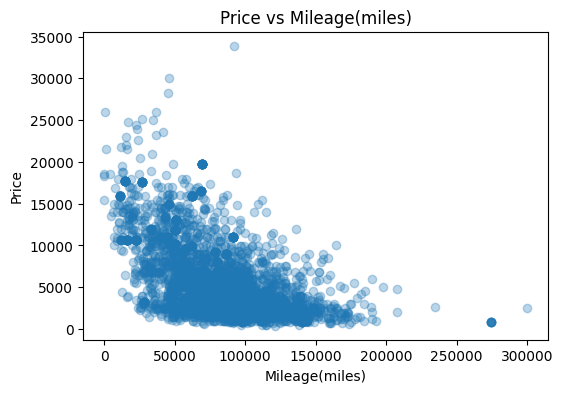

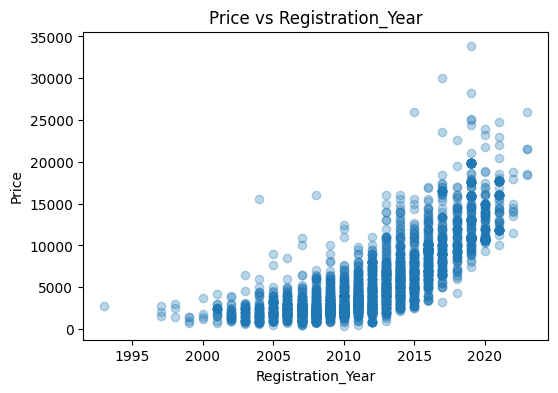

In [491]:
num_cols = [
    'Mileage(miles)',
    'Registration_Year'
]

for col in num_cols:
    plt.figure(figsize=(6, 4))
    plt.scatter(df_clear[col], df_clear['Price'], alpha=0.3)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(f'Price vs {col}')
    plt.show()

<Figure size 800x400 with 0 Axes>

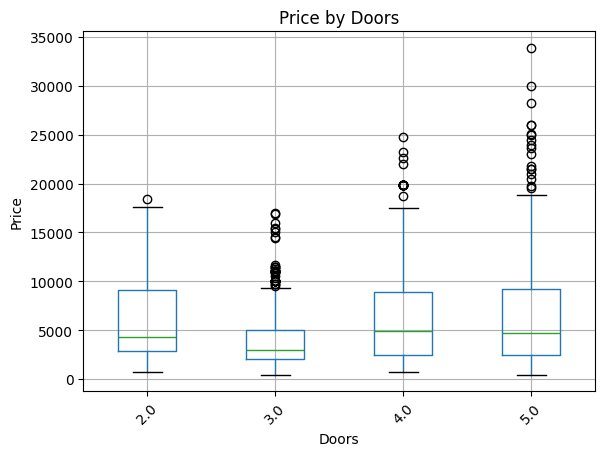

<Figure size 800x400 with 0 Axes>

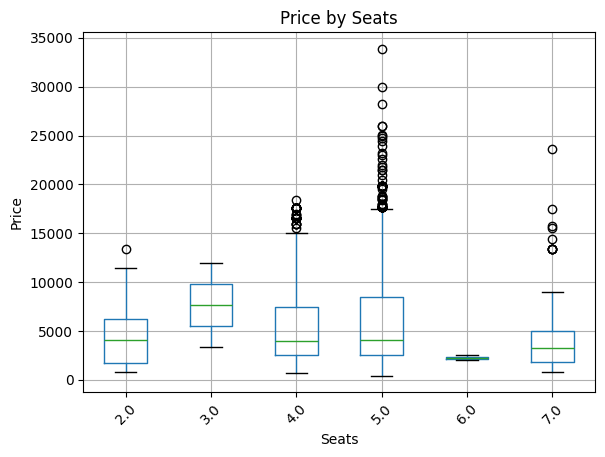

<Figure size 800x400 with 0 Axes>

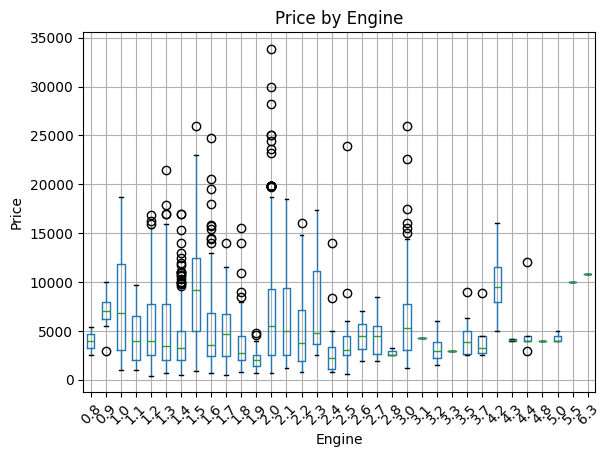

<Figure size 800x400 with 0 Axes>

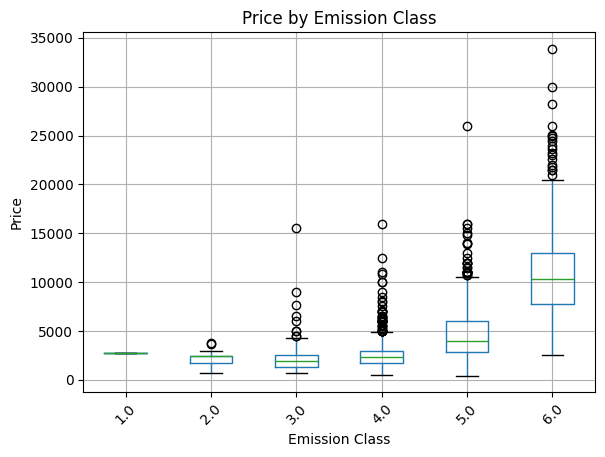

In [ ]:
cat_cols = [
    'Doors',
    'Seats',
    'Engine',
    'Emission Class'
]

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    df_clear.boxplot(column='Price', by=col)
    plt.title(f'Price by {col}')
    plt.suptitle('')   
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.show()

In [495]:
num_df = df_clear.select_dtypes(include='number')
corr_matrix = num_df.corr()
corr_matrix

,Price,Mileage(miles),Registration_Year,Doors,Seats,Engine,Emission Class
Price,1.000000,-0.551431,0.785830,0.113589,-0.024941,-0.025522,0.703709
Mileage(miles),-0.551431,1.000000,-0.479624,-0.028017,0.115014,0.362346,-0.413913
Registration_Year,0.785830,-0.479624,1.000000,0.213366,0.026654,-0.296129,0.918862
Doors,0.113589,-0.028017,0.213366,1.000000,0.498437,-0.060197,0.177538
Seats,-0.024941,0.115014,0.026654,0.498437,1.000000,0.072513,0.022589
Engine,-0.025522,0.362346,-0.296129,-0.060197,0.072513,1.000000,-0.262521
Emission Class,0.703709,-0.413913,0.918862,0.177538,0.022589,-0.262521,1.000000


In [496]:
corr_matrix['Price'].sort_values(ascending=False)

Price                1.000000
Registration_Year    0.785830
Emission Class       0.703709
Doors                0.113589
Seats               -0.024941
Engine              -0.025522
Mileage(miles)      -0.551431
Name: Price, dtype: float64

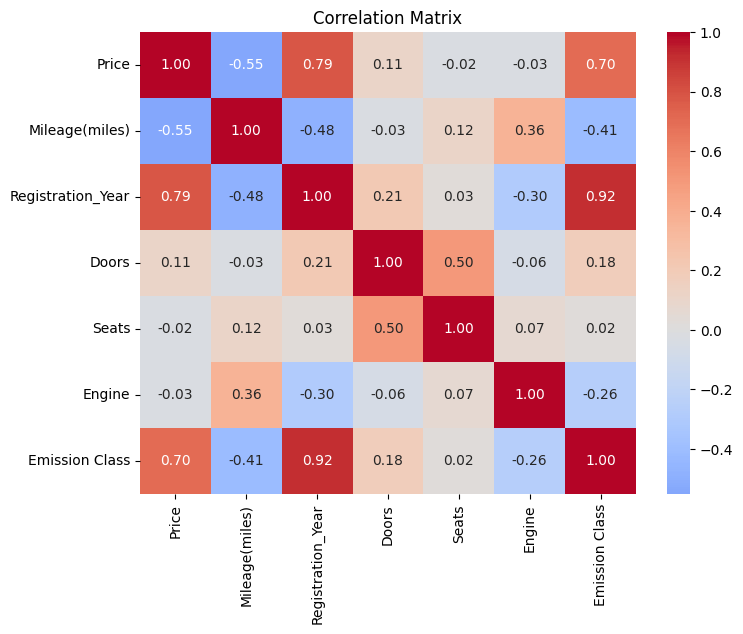

In [497]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    center=0
)
plt.title('Correlation Matrix')
plt.show()

## 📋 데이터 스케일링 + PCA

- 수치형 변수중에 타겟인 price는 제외하고 스케일링 

In [505]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

In [506]:
scale_cols = [
    'Mileage(miles)',
    'Registration_Year',
    'Doors',
    'Seats'
]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clear[scale_cols])

X_scaled_df = pd.DataFrame(
    X_scaled,
    columns=scale_cols
)

X_scaled_df.describe()

,Mileage(miles),Registration_Year,Doors,Seats
count,3.593000e+03,3.593000e+03,3.593000e+03,3.593000e+03
mean,-3.164120e-17,3.480532e-16,1.582060e-17,6.575437e-16
std,1.000139e+00,1.000139e+00,1.000139e+00,1.000139e+00
min,-2.270329e+00,-3.998190e+00,-2.351255e+00,-5.038684e+00
25%,-6.787608e-01,-8.340303e-01,-1.337204e+00,1.760999e-01
50%,-3.591070e-02,9.745813e-03,6.908982e-01,1.760999e-01
75%,6.092576e-01,8.535219e-01,6.908982e-01,1.760999e-01
max,6.108815e+00,2.330130e+00,6.908982e-01,3.652623e+00


In [508]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
pca.explained_variance_ratio_

array([0.39789466, 0.3600713 , 0.1273114 , 0.11472264])

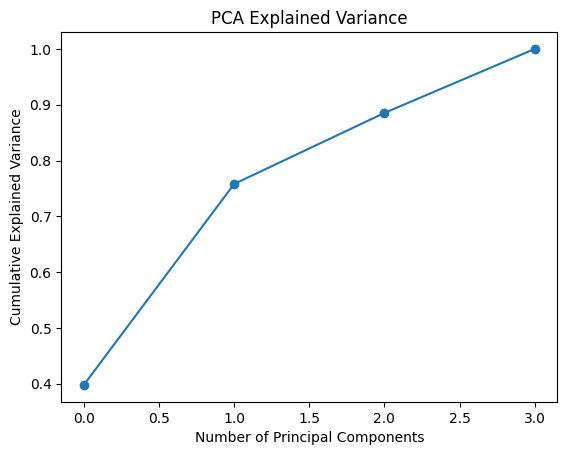

In [509]:
plt.plot(
    np.cumsum(pca.explained_variance_ratio_),
    marker='o'
)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

PCA로 차원 축소를 했을때 
- 주성분 2개를 사용했을 경우 정보력 약 75% 
- 주성분 3개를 사용했을 경우 정보력 약 87% 
이므로 70%를 초과하며 주성분 갯수가 최소인 PCA는 PC2가 된다.

In [512]:
pc_df = pd.DataFrame(
    pca.components_,
    columns=[
        'Mileage(miles)',
        'Registration_Year',
        'Doors',
        'Seats'
    ],
    index=[f'PC{i+1}' for i in range(len(pca.components_))]
)

pc_df

,Mileage(miles),Registration_Year,Doors,Seats
PC1,-0.381812,0.544462,0.594895,0.451532
PC2,0.601773,-0.441878,0.371994,0.551573
PC3,0.639483,0.521855,0.297160,-0.480025
PC4,-0.288357,-0.485770,0.647624,-0.511333


- PC1

Registration_Year: +0.544

Doors: +0.595

Seats: +0.452

Mileage (miles): −0.382

PC1의 특성 : PC1값이 올라갈 수록 연식은 신형이며 차량문과 시트수가 늘어나고 주행거리도 짧아지는것


- PC2

Mileage (miles): +0.602

Seats: +0.552

Registration_Year: −0.442

Doors: +0.372

PC2의 특성 : PC2값이 올라갈 수록 주행거리는 늘고 연식은 구형이며 시트와 차량문 수가 늘어난다 

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


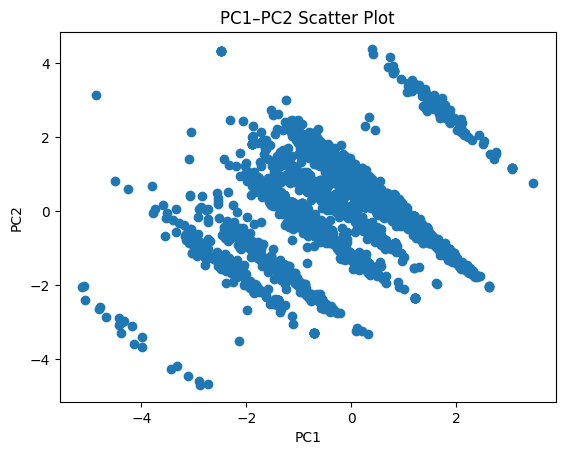

In [513]:
# PCA 결과에서 점수(score) 가져오기
X_pca = pca.transform(X_scaled_df)

pca_df = pd.DataFrame(
    X_pca,
    columns=['PC1', 'PC2', 'PC3', 'PC4']
)

# PC1–PC2 산점도
plt.figure()
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1–PC2 Scatter Plot')
plt.show()

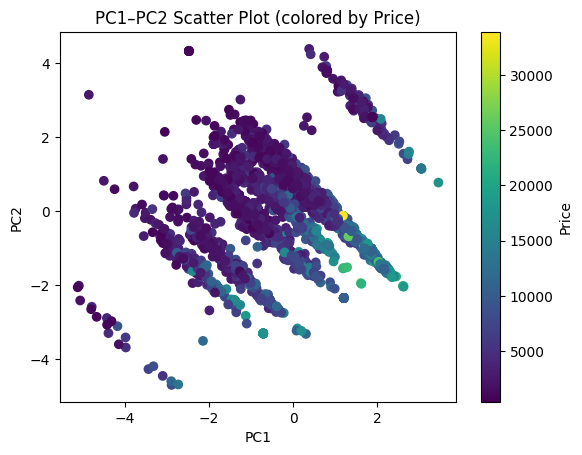

In [514]:
plt.figure()
plt.scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    c=df_clear['Price']
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1–PC2 Scatter Plot (colored by Price)')
plt.colorbar(label='Price')
plt.show()

PC2의 특성은 가격에 영향을 크게 주지는 않는다

반면 PC1의 특성이 가격과 상관관계가 있다고 봄

## 📊 모델링

In [521]:
X_reg = pca_df[['PC1', 'PC2']]
y_reg = df_clear['Price']

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_reg, y_reg)

y_pred = model.predict(X_reg)

model.coef_, model.intercept_

(array([ 1970.5096507 , -2039.18123733]), np.float64(5791.841636515447))

In [522]:
from sklearn.metrics import r2_score

r2 = r2_score(y_reg, y_pred)
r2

0.597102114209052

In [523]:
X_orig = X_scaled_df  # 표준화된 원 변수
model_orig = LinearRegression()
model_orig.fit(X_orig, y_reg)
y_pred_orig = model_orig.predict(X_orig)

r2_orig = r2_score(y_reg, y_pred_orig)
r2_orig

0.6585574628545401

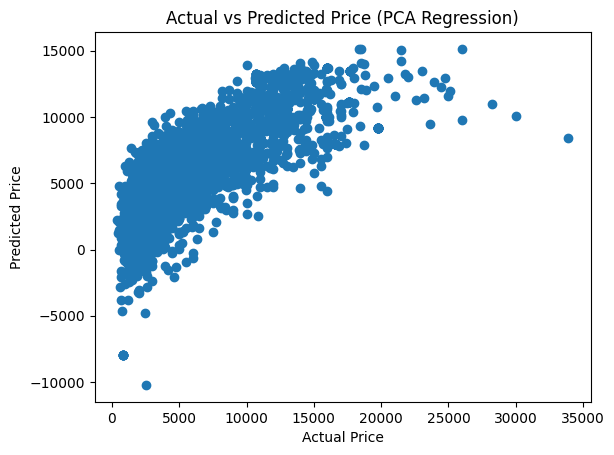

In [524]:
plt.figure()
plt.scatter(y_reg, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (PCA Regression)')
plt.show()

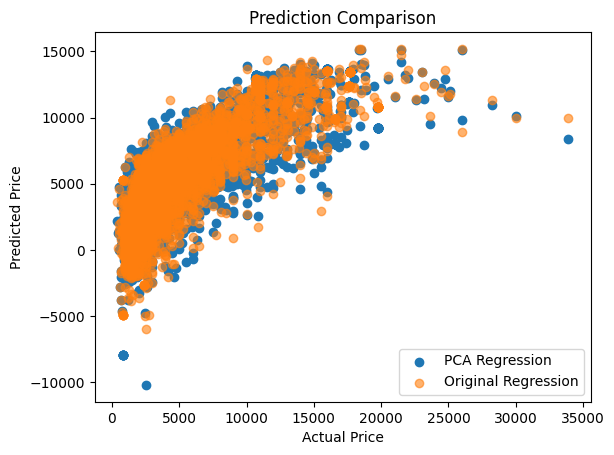

In [525]:
plt.figure()
plt.scatter(y_reg, y_pred, label='PCA Regression')
plt.scatter(y_reg, y_pred_orig, label='Original Regression', alpha=0.6)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Prediction Comparison')
plt.legend()
plt.show()